In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
# Let's begin by loading the uploaded IRIS.csv file and checking its structure.
import pandas as pd

#Step 1: Load the dataset
df = pd.read_csv("/IRIS.csv")

#Step 2: Display the first few rows and summary information
df.head(), df.info(), df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(   sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa,
 None,
         sepal_length  sepal_width  petal_length  petal_width      species
 count     150.000000   150.000000    150.000000   150.000000          150
 unique           NaN          NaN           NaN          NaN            3
 top              NaN          NaN           NaN          NaN  Iris-setosa
 freq             NaN          NaN           NaN          NaN           50
 mean        5.843333     3.054000      3.758667     1.198667          NaN
 std         0.828066     0.433594      1.764420     0.763161          NaN
 min         4.300000     2.000000      1.00000

In [ ]:
#Step 3: Basic Info and Check for Nulls/Duplicates
print("Null values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Null values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Duplicate rows: 3


In [ ]:
#Step 4: Handle Missing Values
for col in df.columns[:-1]:  # Skip species column
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)


In [ ]:
#Step 5: Drop Duplicate Rows (if any)
df.drop_duplicates(inplace=True)


<ipython-input-17-efe9ebfb15ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='Set2')


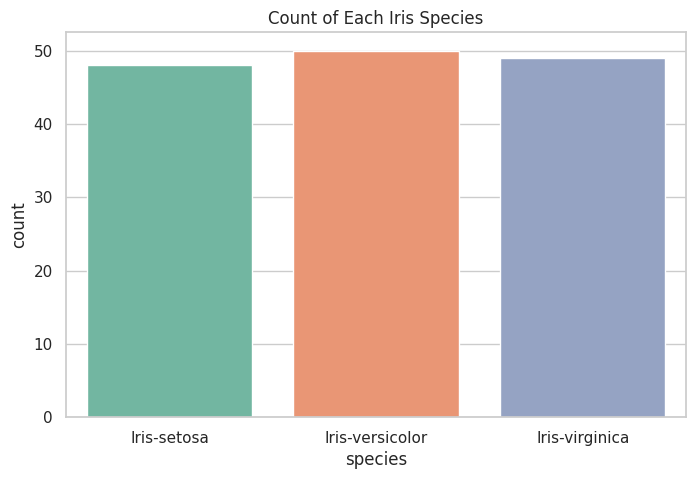

In [ ]:
#Step 6: Plotting — Data Visualization

#Count Plot (Target Variable)
sns.countplot(x='species', data=df, palette='Set2')
plt.title("Count of Each Iris Species")
plt.show()


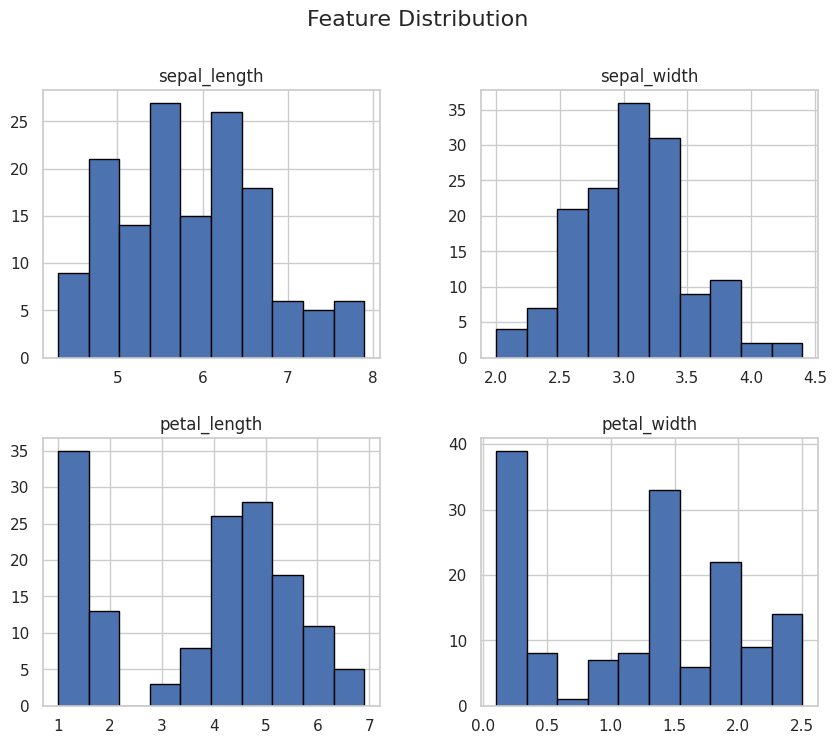

In [ ]:
 #Histograms for All Features
df.hist(edgecolor='black', figsize=(10, 8))
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()


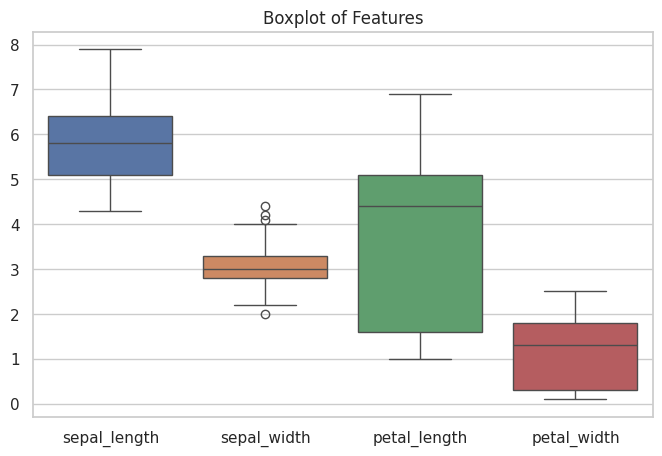

In [ ]:
#Boxplots
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplot of Features")
plt.show()


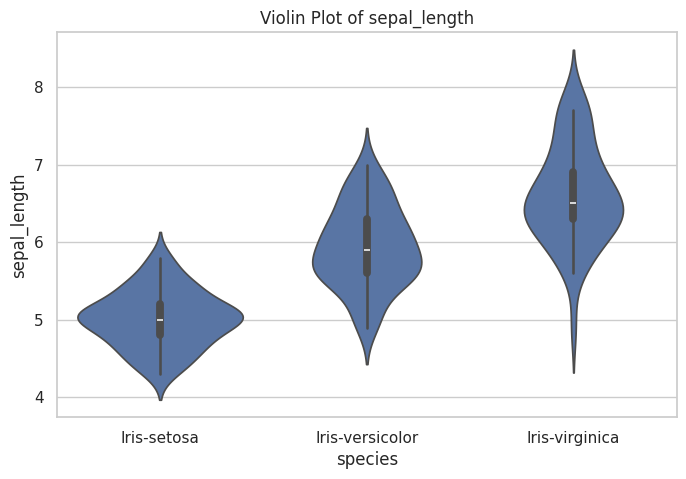

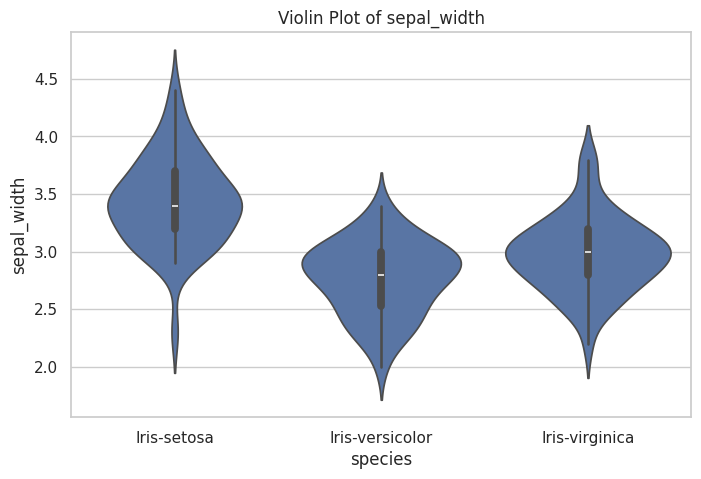

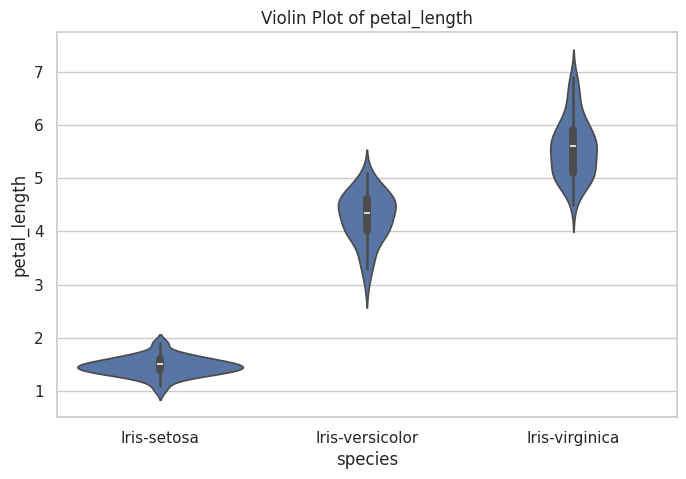

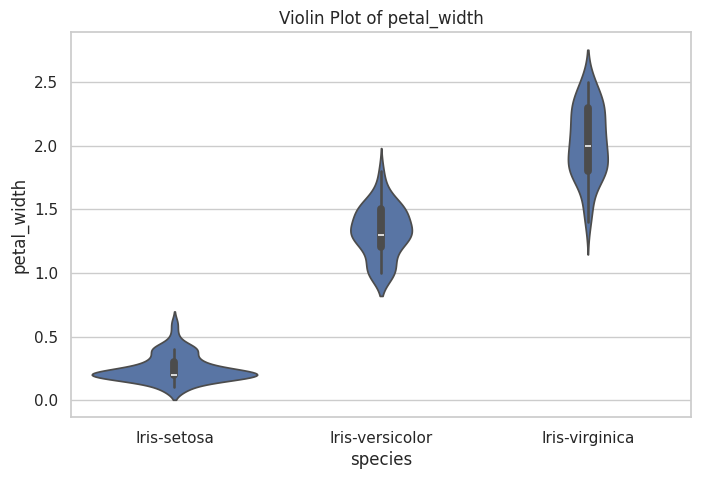

In [ ]:
#Violin Plots (Feature vs Species)
for col in df.columns[:-1]:
    sns.violinplot(x='species', y=col, data=df)
    plt.title(f"Violin Plot of {col}")
    plt.show()


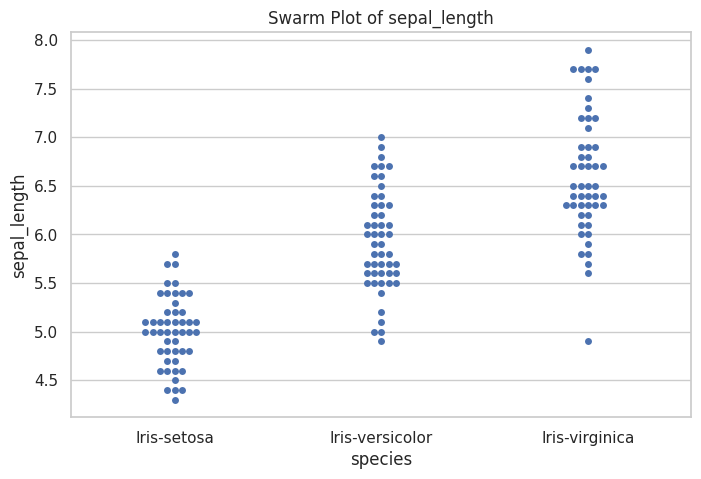

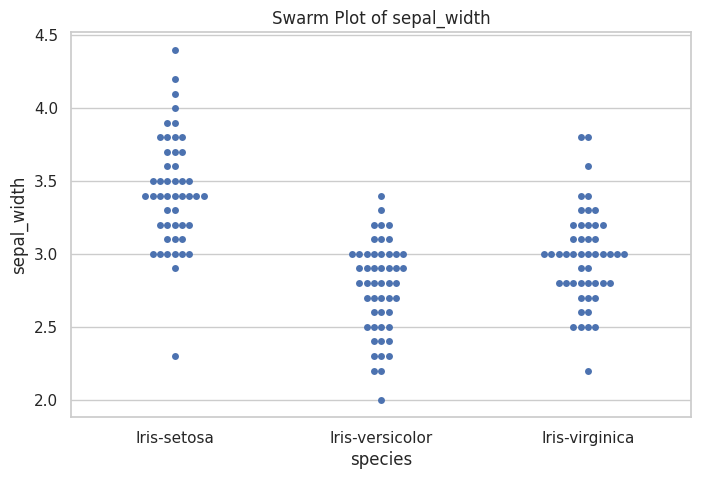

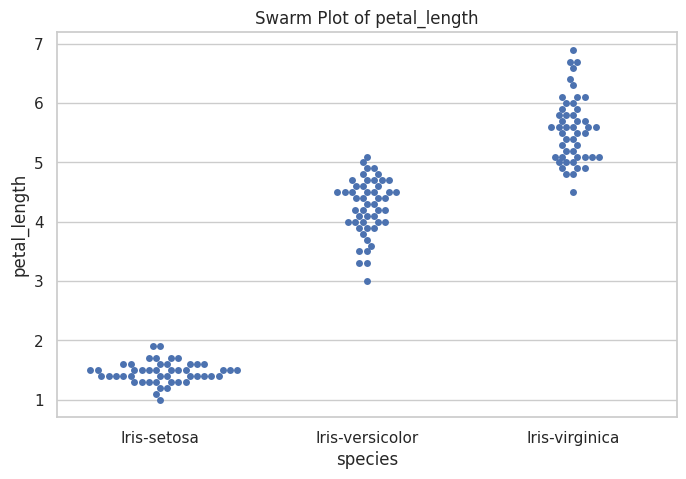

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


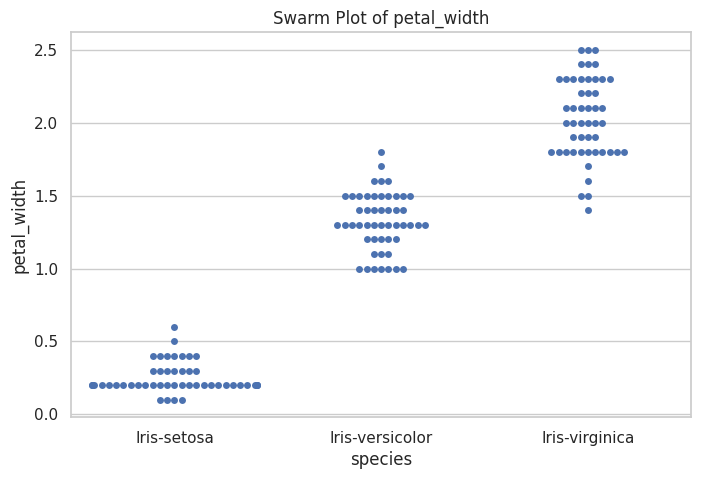

In [ ]:
#Swarm Plots
for col in df.columns[:-1]:
    sns.swarmplot(x='species', y=col, data=df)
    plt.title(f"Swarm Plot of {col}")
    plt.show()


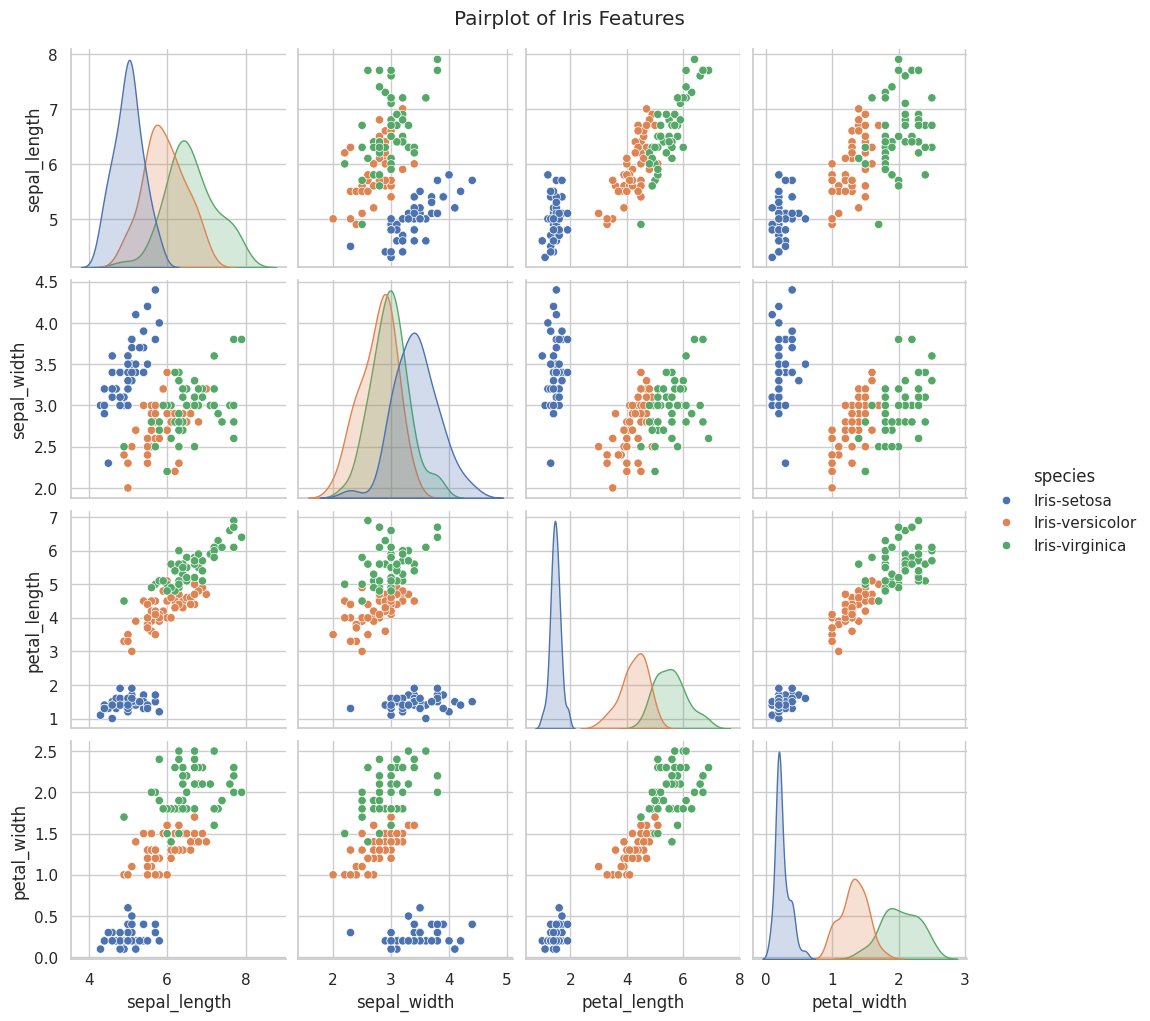

In [ ]:
#Pairplot
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


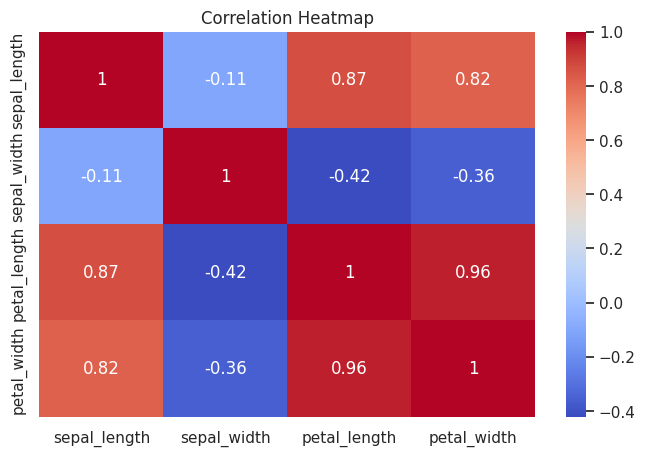

In [ ]:
#Correlation Heatmap
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Step 7: Detect and Remove Outliers using IQR
# Make a copy to preserve original data
df_no_outliers = df.copy()

# Loop through each numeric column to detect outliers using IQR
for col in df_no_outliers.select_dtypes(include=np.number).columns:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only the rows within the bounds
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Check the shape before and after
print("Original shape:", df.shape)
print("After outlier removal:", df_no_outliers.shape)


Original shape: (147, 5)
After outlier removal: (143, 5)


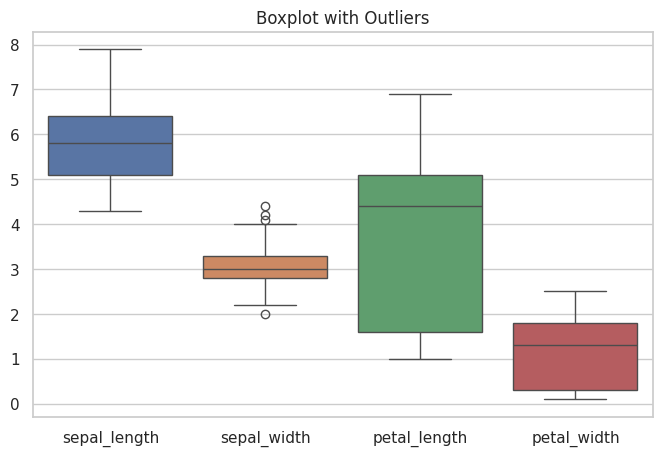

In [ ]:
# Boxplots before outlier removal
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplot with Outliers")
plt.show()


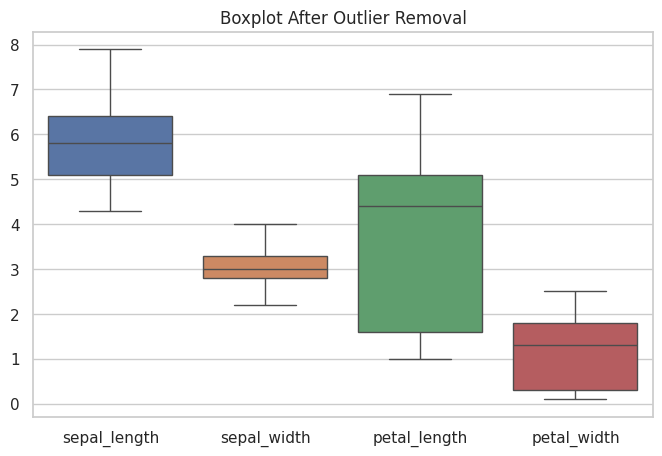

In [ ]:
# Boxplots after outlier removal
sns.boxplot(data=df_no_outliers.iloc[:, :-1])
plt.title("Boxplot After Outlier Removal")
plt.show()


In [ ]:
# Step 8: Encode the species column
le = LabelEncoder()
df_no_outliers['species_encoded'] = le.fit_transform(df_no_outliers['species'])

In [ ]:
# Step 9: Split into features and target
X = df_no_outliers.iloc[:, :-2]  # exclude species and encoded target
y = df_no_outliers['species_encoded']


In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 10: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 11: Make Predictions
y_pred = model.predict(X_test)


In [ ]:
# Step 12: Evaluate the Model
print("\n Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



 Model Evaluation:
Accuracy Score: 0.896551724137931

Confusion Matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        29
      macro avg       0.91      0.90      0.90        29
   weighted avg       0.90      0.90      0.90        29



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# classification evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nAdditional Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")



Additional Metrics:
Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.32
Mean Absolute Error (MAE): 0.10


In [ ]:
#Compare Multiple Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.2f}")


Random Forest: Accuracy = 0.90
Logistic Regression: Accuracy = 0.90
K-Nearest Neighbors: Accuracy = 0.90
Support Vector Machine: Accuracy = 0.90


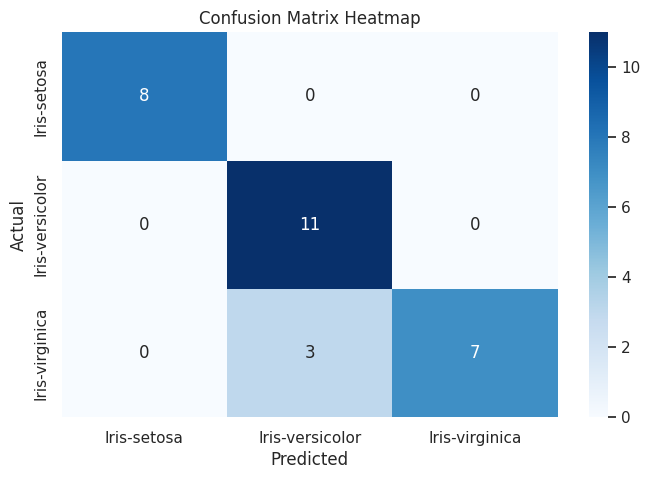

In [ ]:
#Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


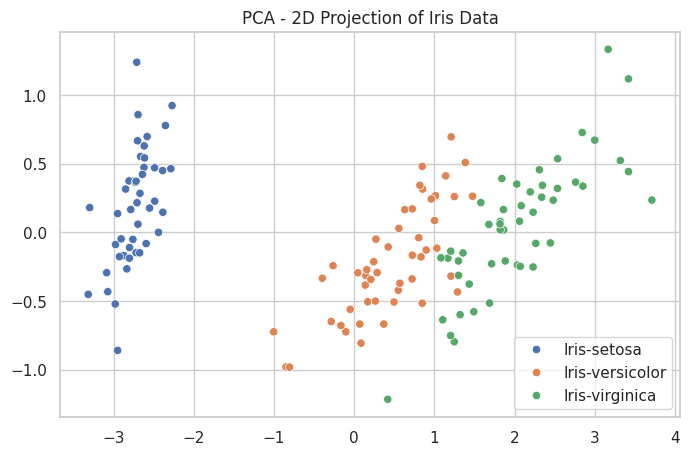

In [ ]:
#PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=le.inverse_transform(y))
plt.title("PCA - 2D Projection of Iris Data")
plt.show()


In [ ]:
#Simple User Interface for Prediction
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # example input
pred = model.predict(sample)
print("Predicted species:", le.inverse_transform(pred)[0])


Predicted species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
